# An Empirical Study of Recent Face Alignment Methods  
<a href='https://sites.google.com/site/yanghengcv/'> Heng Yang </a>, Xuhui Jia, <a href='http://personal.ie.cuhk.edu.hk/~ccloy/'> Chen Change Loy </a> and <a href='http://www.cl.cam.ac.uk/~pr10/'> Peter Robinson </a>


##Face alignment 
A large number of face alignment methods have been proposed and reported very good performance on benchmark dataset such as 300W in recent years (See list here: <a href='https://sites.google.com/site/yanghengcv/face-alignment'>Face Alignment </a>). However, the differences in the experimental setting and evaluation metric, missing details in the description of the methods make it hard to reproduce the results reported and evaluate the relative merits. For instance, most recent face alignment methods are built on top of face detection but from different face detectors. In this project, we carry out a rigorous evaluation of these methods. Please refer to our paper on <a href='http://arxiv.org/pdf/1511.05049.pdf'>arXiv</a> for details: 

##300W++ dataset 
We extend the <a href='http://ibug.doc.ic.ac.uk/resources/300-W/'>300W</a> dataset from ibug group and form the 300W++ (CAM300W) dataset. We provide several commonly used face detections (HOG+SVM provided by http://dlib.net/, Voila-Jones from Matlab, <a href='http://markusmathias.bitbucket.org/2014_eccv_face_detection/'>HeadHunter</a> for each face in images, in addition to the tight face bounding box (IBUG). We also provide the head pose (three angles) information fo each face, estimated from the annotated 2D landmark coordinates.
We aim to provide a more pratical and a fairer benchmark to evaluate face alignment methods that are built on top of face detection. The dataset is split into training set and testing set. The training set consists of face images from AFW, training images from Helen and LFPW. The test set consists of faces images Helen and LFPW test set and the ibug set. We store the information in python pandas database format. 
##Evalution metric
We propose a new evalution metric that is able to evalute the performance of a face alignment method on a set of images, i.e. AUC$_\alpha$. It is based on the Cumulative Error Distribution Curve and caculated as: 
AUC$_{\alpha} = \int_0^{\alpha}f(e)de$. 
We provide simple python script CAMFA.py that is useful to evaluate  face alignment on the extended dataset. 
##Contact
We will make all the data and source code publicly available when the paper gets published. If you want to get access to them in advance, please contact <a href='https://sites.google.com/site/yanghengcv/'> Heng Yang </a> (yanghengnudt[AT]gmail.com). 

In [2]:
#load the test dataset 
import pandas as pd
import numpy as np
import pylab as plt
import CAMFA as CF ##this is the python class used for evaluation
import prettyplotlib as ppl
import matplotlib
import facedraw as fd##functions used to draw result figures in the paper 
import pickle as pkl
dbtest = pd.read_pickle('./dataset/CAM300W_test.pkl')
dbtest.head(3)

,ImgFile,GTBB,GTLMs,BB_HH,BB_HOG,BB_VJ,HeadPose
0,./helen/testset/296814969_3.jpg,"[266.309, 292.52, 300.1797, 270.8254]","[265.309, 352.5, 270.507, 392.107, 281.902, 42...","[325.11, 282.81, 250.17, 250.17]","[271.0, 236.0, 321.0, 321.0]","[285.0, 211.0, 327.0, 327.0]","[12.392, 11.052, -6.0501]"
1,./helen/testset/2968560214_1.jpg,"[129.4643, 297.9162, 553.5357, 555.0445]","[135.607, 318.032, 130.156, 390.964, 128.464, ...","[93.62, 321.83, 526.63, 526.63]","[45.0, 193.0, 666.0, 666.0]","[48.0, 207.0, 590.0, 590.0]","[18.226, -9.6122, 8.0485]"
2,./helen/testset/2968784797_1.jpg,"[352.2459, 1052.0363, 2156.6365, 1795.9637]","[351.246, 1496.715, 408.352, 1741.311, 479.109...","[606.45, 992.37, 1911.22, 1911.22]","[430.0, 695.0, 2385.0, 2385.0]","[604.0, 512.0, 2181.0, 2181.0]","[0.602, 6.8633, -2.4958]"


ImgFile is the path of each image, replace './' with your image data directory <br />
GTBB is the bound box provided by IBUG <br />
GTLMs is the locations of the facial landmarks, organised in a a order of x1,y1,x2,y2...x68,y68<br />
BB_HH, BB_HOG, BB_VJ are the face bounding boxes for the corresponding face detectors <br />
HeadPose are the three head pose angles <br />

Result shape is (689, 136)


AttributeError: '_process_plot_var_args' object has no attribute 'color_cycle'

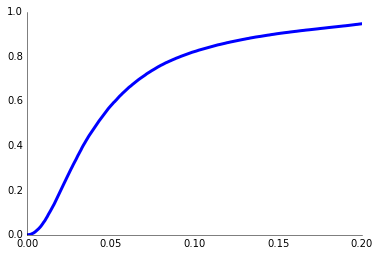

In [5]:
#an example of using CAMFA
#initalise the alignment evaluation class
%matplotlib inline 
gtxy = np.array([xy for xy in dbtest['GTLMs'].values])# get ground truth xy
GEA = CF.Group_Error_ANA(gtxy)# initialise group error analyser 
#assume a file called 'result.txt' stores the face alignment result of a certain method and the format is correct 
result = np.loadtxt('result.txt') 
print('Result shape is {}'.format(result.shape))
auc, bins, CDF = GEA.get_edf_histogram(result,thr_=0.2)#thr_ is the alpha value (0.3 by defualt)

fig = plt.figure()
ax = fig.add_subplot(111)
ppl.plot(bins,CDF,lw=3)
ppl.fill_between(bins,0*len(CDF),CDF,alpha=0.5)
plt.xlabel('Normalised error')
plt.ylabel('Proportion of landmarks')
an = ax.annotate('AUC=%1.4f'%auc,xy=(0.13,0.5))

/home/hengyang/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


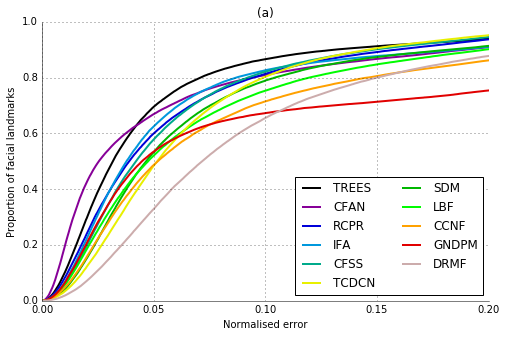

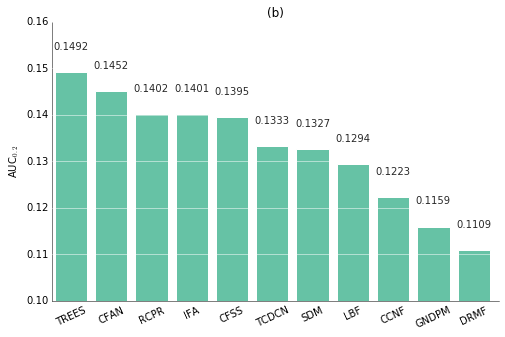

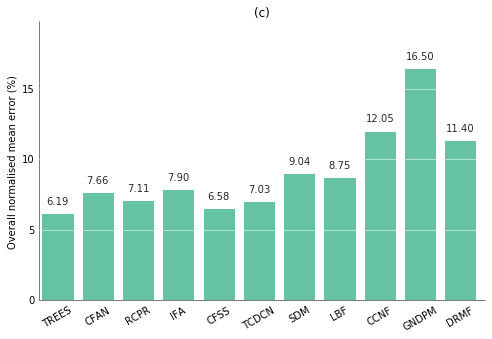

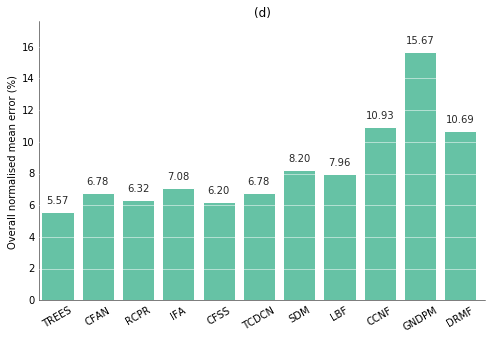

In [4]:
fd.basic_compare()

####Performance comparison of off-the-shelf models.  
<br /> (a) cumulative error distribution. (b) plot of AUC$_{0.2}$. (c) Mean error on all test images. (d) Mean error on test set excluding the top 5 erroneous images.

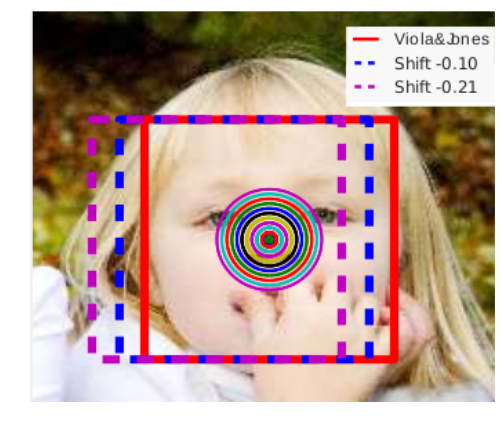

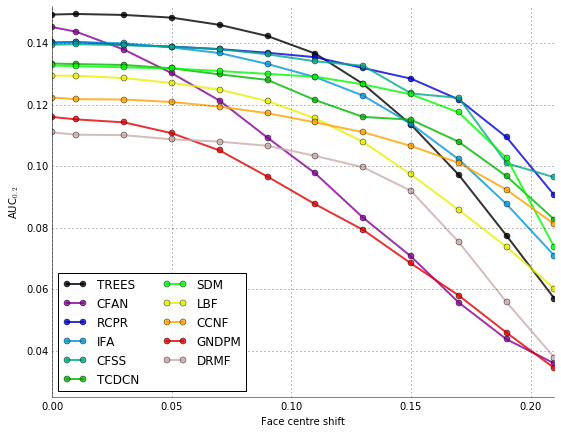

In [6]:
matplotlib.rcParams['figure.figsize'] = (9, 7)
fd.draw_ots_sens_center()

####AUC$_{0.2}$ performance (sensitivity) vs. face centre shift 

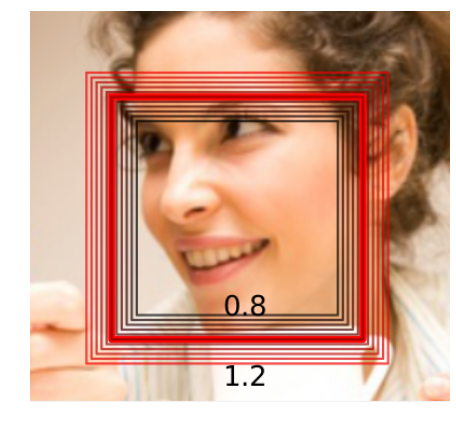

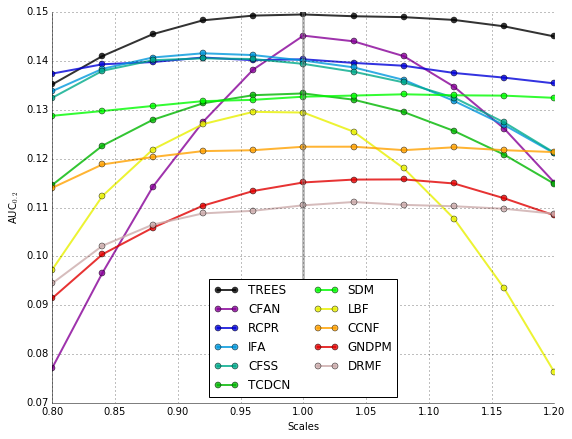

In [7]:
fd.draw_ots_sens_scale()

####AUC$_{0.2}$ performance (sensitivity) vs. face scale changes

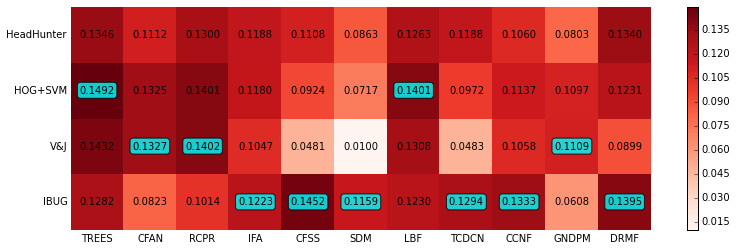

In [6]:
matplotlib.rcParams['figure.figsize'] = (13, 4)
fd.draw_real_facebb_res()

####AUC$_{0.2}$ from various face detections